1\. Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом

2\.1\. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл.

In [24]:
import re 
import spacy
nlp = spacy.load('en')

with open("Harry_Potter_and_the_Sorcerers_Stone.txt", "r+", encoding="utf-8") as f, open("result.txt", "w+", encoding="utf-8") as g:
    povar = f.read()
    h1 = re.sub('[\'!\"#$%&()*+,-./:;<=>?@[\]^_`{|}~„“«»†*—/\-"]', '', povar)
    h2 = h1.lower()
    h3 = nlp(h2)
    lemmas = [token.lemma_ for token in h3 if not token.is_stop]
    for lemm in lemmas:
        g.write("%s\n" % lemm)

2\.2\. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

In [193]:
import re
from operator import itemgetter
from collections import Counter
#from collections import defaultdict

frequency = {}
open_file = open('result.txt', 'r')
file_to_string = open_file.read()
words = re.findall(r'(\b[A-Za-z][a-z]{2,20}\b)', file_to_string)
 
os_x = {}
os_y = {}

for word in words:
    count = frequency.get(word,0)
    frequency[word] = count + 1

for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
    if key in os_x:
        pass
    else:
        os_x[key] = 0

os_x = {key: rank for rank, key in enumerate(sorted(os_x, key=os_x.get), 1)}

for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
    otn = value/len(words)
    os_y[key] = otn

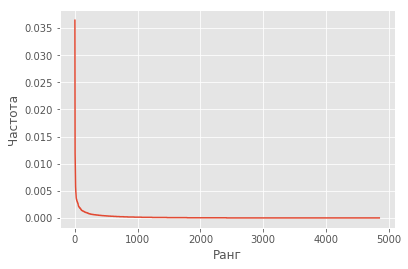

In [194]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(list(os_x.values()), list(os_y.values()))
plt.xlabel("Ранг")
plt.ylabel("Частота")
plt.show()

3\. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.